### Importing Library

In [1]:
import tensorflow as tf 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
day_data=pd.read_csv('Bike-Sharing-Dataset/day.csv')
hour_data=pd.read_csv('Bike-Sharing-Dataset/hour.csv')

In [3]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
day_data.shape

(731, 16)

In [5]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
hour_data.shape

(17379, 17)

In [7]:
dummy_fields = ['season', 'weathersit', 'mnth', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(day_data[each], prefix=each, drop_first=False)
    day_data = pd.concat([day_data, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday']
day_data = day_data.drop(fields_to_drop, axis=1)
day_data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.344167,0.805833,0.160446,331,654,985,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.363478,0.696087,0.248539,131,670,801,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0.196364,0.437273,0.248309,120,1229,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0.200000,0.590435,0.160296,108,1454,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0.226957,0.436957,0.186900,82,1518,1600,1,0,...,0,0,0,0,0,0,1,0,0,0


In [8]:
day_data.shape

(731, 34)

In [9]:
dummy_fields_hour = ['season', 'weathersit', 'mnth', 'weekday','hr']
for each in dummy_fields_hour:
    dummies = pd.get_dummies(hour_data[each], prefix=each, drop_first=False)
    hour_data = pd.concat([hour_data, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday','hr']
hour_data = hour_data.drop(fields_to_drop, axis=1)
hour_data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
quant_features = [ 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = day_data[each].mean(), day_data[each].std()
    scaled_features[each] = [mean, std]
    day_data.loc[:, each] = (day_data[each] - mean)/std

In [11]:
day_data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-0.826097,1.249316,-0.387626,331,654,985,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-0.720601,0.478785,0.749089,131,670,801,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,-1.633538,-1.338358,0.746121,120,1229,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,-1.613675,-0.263001,-0.389562,108,1454,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,-1.466410,-1.340576,-0.046275,82,1518,1600,1,0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
hour_data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
target_fields = ['cnt', 'casual', 'registered']
X, y = day_data.drop(target_fields, axis=1), day_data[target_fields]

In [14]:
X

,yr,holiday,temp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,...,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-0.826097,1.249316,-0.387626,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-0.720601,0.478785,0.749089,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,-1.633538,-1.338358,0.746121,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,-1.613675,-0.263001,-0.389562,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,-1.466410,-1.340576,-0.046275,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,-1.317763,0.175687,2.060015,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
727,1,0,-1.322319,-0.266056,-0.451822,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,-1.322319,0.877791,-0.852968,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
729,1,0,-1.308661,-1.014969,2.068028,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0


In [15]:
y

,cnt,casual,registered
0,985,331,654
1,801,131,670
2,1349,120,1229
3,1562,108,1454
4,1600,82,1518
...,...,...,...
726,2114,247,1867
727,3095,644,2451
728,1341,159,1182
729,1796,364,1432


In [16]:
# Splitng our data for traing and Validation data
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,test_size=0.4)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,test_size=0.2)

In [17]:
# Creating Layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu',kernel_initializer='he_uniform', input_shape=X_train.shape[1:]),
    #tf.keras.layers.Dense(80, activation='relu',kernel_initializer='he_uniform'),
    #tf.keras.layers.Dense(100, activation='relu',kernel_initializer='he_uniform'),
    #tf.keras.layers.Dense(60, activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(50, activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(30, activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(15, activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10, activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10, activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(5, activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(3,activation='linear')
])

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=5,monitor='val_loss',restore_best_weights=True)

In [19]:
opt = tf.keras.optimizers.Adam(lr=0.001,decay=1e-3 / 100)
model.compile(loss="mse", optimizer=opt)
history=model.fit(X_train, y_train, epochs=100,batch_size=10, validation_data=(X_valid, y_valid),callbacks=[es])

Epoch 1/100
35/35 [==============================] - 0s 9ms/step - loss: 13282140.0000 - val_loss: 14717914.0000
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 13226692.0000 - val_loss: 14520665.0000
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 12205782.0000 - val_loss: 11407888.0000
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 5247259.5000 - val_loss: 1677683.6250
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 1274936.6250 - val_loss: 1169165.5000
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 843121.8125 - val_loss: 974544.9375
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 703215.7500 - val_loss: 890363.4375
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 628772.1250 - val_loss: 844894.1875
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 583592.6250 - val_loss: 796776.4375
Epo

35/35 [==============================] - 0s 3ms/step - loss: 317584.1250 - val_loss: 590643.5625
Epoch 76/100
35/35 [==============================] - 0s 3ms/step - loss: 311185.6562 - val_loss: 575091.0625
Epoch 77/100
35/35 [==============================] - 0s 3ms/step - loss: 307440.1250 - val_loss: 582906.5625
Epoch 78/100
35/35 [==============================] - 0s 3ms/step - loss: 304849.9062 - val_loss: 571227.4375
Epoch 79/100
35/35 [==============================] - 0s 3ms/step - loss: 303427.8125 - val_loss: 582614.1875
Epoch 80/100
35/35 [==============================] - 0s 3ms/step - loss: 299886.4375 - val_loss: 576412.4375
Epoch 81/100
35/35 [==============================] - 0s 3ms/step - loss: 299781.3438 - val_loss: 566722.1875
Epoch 82/100
35/35 [==============================] - 0s 3ms/step - loss: 298707.6250 - val_loss: 567162.4375
Epoch 83/100
35/35 [==============================] - 0s 3ms/step - loss: 295719.0312 - val_loss: 568182.4375
Epoch 84/100
35/35 [===

dict_keys(['loss', 'val_loss'])


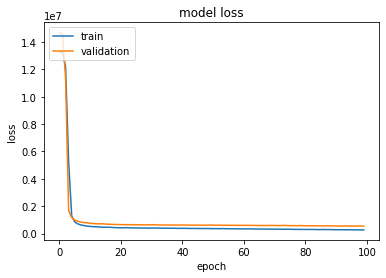

In [20]:
import matplotlib.pyplot as plt
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [23]:
pred=model.predict(X_test)

In [24]:
xx=np.array(X_test)
xx[1]

array([ 1.        ,  0.        , -2.11899851, -1.49766494, -0.07466285,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ])

In [25]:
np.sqrt(((pred - y_test) ** 2).mean())

cnt           790.815676
casual        605.992140
registered    685.998496
dtype: float64

In [26]:
y_val=np.array(y_test)

In [32]:
y_val[2]

array([3663,  943, 2720], dtype=int64)

In [31]:
pred[[2]]

array([[3376.2827,  625.9728, 2754.5103]], dtype=float32)

In [ ]:
######################### Above Model Predicts the Data on day data ##############################################################

#### Hourly Predictions 

In [34]:
quant_features_hourly = [ 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features_hourly:
    mean, std = hour_data[each].mean(), hour_data[each].std()
    scaled_features[each] = [mean, std]
    hour_data.loc[:, each] = (hour_data[each] - mean)/std

In [35]:
target_fields_hour = ['cnt', 'casual', 'registered']
X_hour, y_hour = hour_data.drop(target_fields_hour, axis=1), hour_data[target_fields_hour]

In [36]:
X_hour

,yr,holiday,temp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,...,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
0,0,0,-1.334609,0.947345,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,-1.334609,0.636351,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,-1.334609,0.636351,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,-1.230743,-0.141133,-0.211685,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17375,1,0,-1.230743,-0.141133,-0.211685,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
17376,1,0,-1.230743,-0.141133,-0.211685,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
17377,1,0,-1.230743,-0.348463,-0.456086,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [37]:
y_hour

,cnt,casual,registered
0,16,3,13
1,40,8,32
2,32,5,27
3,13,3,10
4,1,0,1
...,...,...,...
17374,119,11,108
17375,89,8,81
17376,90,7,83
17377,61,13,48


In [38]:
# Splitng our data for traing and Validation data
X_train_hour_full, X_test_hour, y_train_hour_full, y_test_hour = train_test_split(X_hour, y_hour,test_size=0.4)
X_train_hour, X_valid_hour, y_train_hour, y_valid_hour = train_test_split(X_train_hour_full, y_train_hour_full,test_size=0.2)

In [39]:
# Creating Layers
model_hour = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu',kernel_initializer='he_uniform', input_shape=X_train_hour.shape[1:]),
    #tf.keras.layers.Dense(80, activation='relu',kernel_initializer='he_uniform'),
    #tf.keras.layers.Dense(100, activation='relu',kernel_initializer='he_uniform'),
    #tf.keras.layers.Dense(60, activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(50, activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(30, activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(15, activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10, activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10, activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(5, activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(3,activation='linear')
])

In [40]:
es_hour = EarlyStopping(patience=5,monitor='val_loss',restore_best_weights=True)

In [41]:
opt_hour = tf.keras.optimizers.Adam(lr=0.001,decay=1e-3 / 100)
model_hour.compile(loss="mse", optimizer=opt_hour)
history_hour=model_hour.fit(X_train_hour, y_train_hour, epochs=100,batch_size=10, validation_data=(X_valid_hour, y_valid_hour),callbacks=[es_hour])

Epoch 1/100
835/835 [==============================] - 2s 2ms/step - loss: 11243.0381 - val_loss: 4928.3770
Epoch 2/100
835/835 [==============================] - 1s 2ms/step - loss: 3632.4187 - val_loss: 2705.4507
Epoch 3/100
835/835 [==============================] - 1s 2ms/step - loss: 2028.4414 - val_loss: 1813.9883
Epoch 4/100
835/835 [==============================] - 1s 2ms/step - loss: 1598.7045 - val_loss: 1672.0151
Epoch 5/100
835/835 [==============================] - 1s 2ms/step - loss: 1417.2000 - val_loss: 1544.3036
Epoch 6/100
835/835 [==============================] - 1s 1ms/step - loss: 1271.4065 - val_loss: 1434.2275
Epoch 7/100
835/835 [==============================] - 1s 1ms/step - loss: 1208.9323 - val_loss: 1462.9847
Epoch 8/100
835/835 [==============================] - 1s 2ms/step - loss: 1126.7120 - val_loss: 1369.0537
Epoch 9/100
835/835 [==============================] - 1s 2ms/step - loss: 1068.7966 - val_loss: 1250.1545
Epoch 10/100
835/835 [==============

dict_keys(['loss', 'val_loss'])


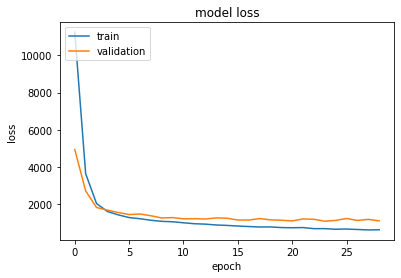

In [42]:
print(history_hour.history.keys())
# "Loss"
plt.plot(history_hour.history['loss'])
plt.plot(history_hour.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [43]:
pred_hour=model_hour.predict(X_test_hour)

In [44]:
np.sqrt(((pred_hour - y_test_hour) ** 2).mean())

cnt           41.884605
casual        17.427866
registered    34.239279
dtype: float64

In [47]:
y_val_hour=np.array(y_test_hour)

In [50]:
y_val_hour[2]

array([632,  52, 580], dtype=int64)

In [51]:
pred_hour[[2]]

array([[633.77356,  82.32213, 556.3555 ]], dtype=float32)

In [57]:
y_test_hour.head()

,cnt,casual,registered
129,62,8,54
3191,174,23,151
11389,632,52,580
2107,196,111,85
9548,338,11,327
